In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

---

# The Nature of Waves

We're mainly going to talk about sound waves, but many of these things will apply to other types of waves.

## How do we represent waves?

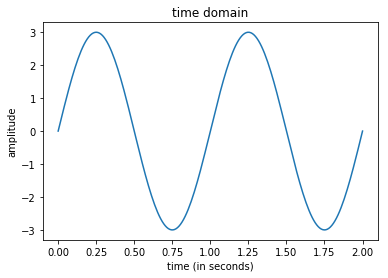

In [2]:
freq = 1 #hz - cycles per second
amplitude = 3
time_to_plot = 2 # second
sample_rate = 100 # samples per second
num_samples = sample_rate * time_to_plot

t = np.linspace(0, time_to_plot, num_samples)
signal = [amplitude * np.sin(freq * i * 2*np.pi) for i in t] # Explain the 2*pi

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, signal)

## In the context of sound, what would a wave like this represent?

* Answer: Changes in air pressure
* When the graph is above x=0, the pressure of the air is more than "normal" (air is moving toward you)
* When the graph is below x=0, the pressure of the air is less than "normal" (air is moving away from you)

# Example of a real sound wave

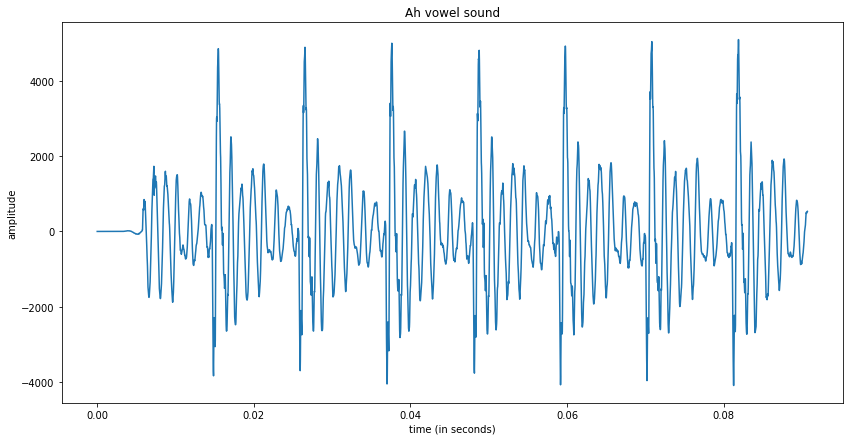

In [3]:
import scipy.io.wavfile

(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/vowel_ah.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)
setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

# The Superposition Principle

* If you add a bunch of waves together, it forms one wave.
* Hearing me talk while knocking on the desk

# Example

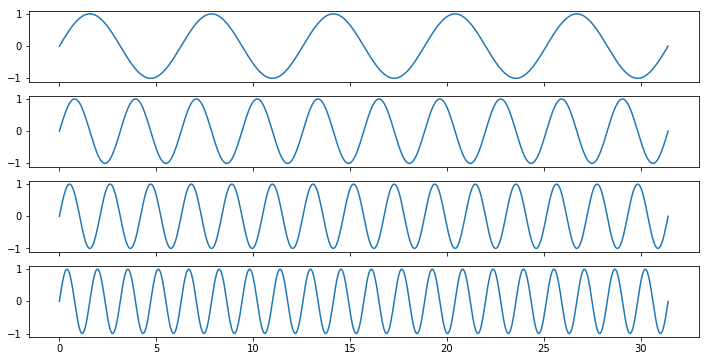

In [4]:
# Two subplots, the axes array is 1-d
x = np.linspace(0, 10 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(2*x)
y3 = np.sin(3*x)
y4 = np.sin(4*x)

f, axarr = plt.subplots(4, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y1)
axarr[1].plot(x, y2)
axarr[2].plot(x, y3)
axarr[3].plot(x, y4)
_ = plt.show()

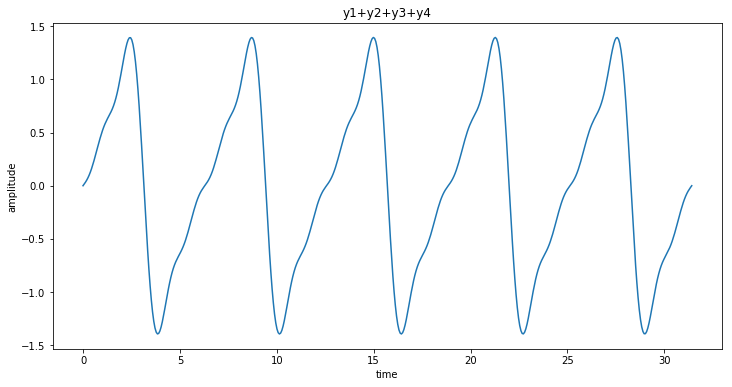

In [5]:
setup_graph(x_label='time', y_label='amplitude', title='y1+y2+y3+y4', fig_size=(12,6))
convoluted_wave = y1 - 0.5 * y2 + 0.25 * y3 - 0.125 * y4
_ = plt.plot(x, convoluted_wave)

# Wave Interference Example

### This is how noise-canceling headphones work

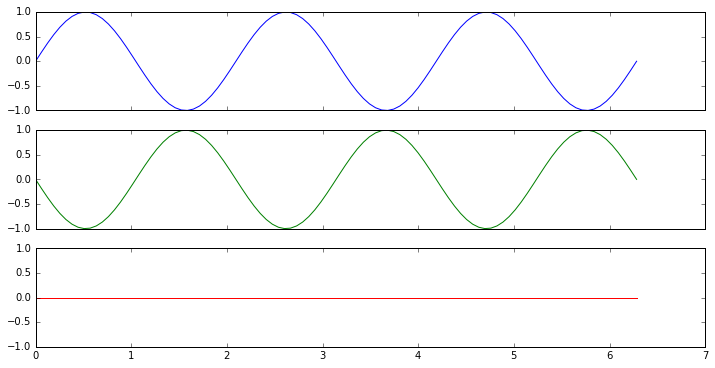

In [29]:
y5 = np.sin(3 * x)
y6 = -1 * np.sin(3 * x)

f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y5, 'b')
axarr[1].plot(x, y6, 'g')
axarr[2].plot(x, y5 + y6, 'r')
_ = plt.show()